# Burnout en empleados corporativos - Aprendizaje de Máquina - TP FINAL

---
## Regresión Logística
---

#### 1. Carga de datos

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV

In [168]:
# Cargar de los datasets
X_train = pd.read_csv("output/burnout_X_train.csv")
y_train = pd.read_csv("output/burnout_y_train.csv")
X_test = pd.read_csv("output/burnout_X_test.csv")
y_test = pd.read_csv("output/burnout_y_test.csv")
X_train_PCA = pd.read_csv("output/burnout_X_train_PCA.csv")
X_test_PCA = pd.read_csv("output/burnout_X_test_PCA.csv")

In [169]:
X_train.shape, y_train.shape

((16853, 13), (16853, 1))

In [170]:
X_train.head()

,Designation,Resource Allocation,Mental Fatigue Score,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency,Gender_Male,Company Type_Service,WFH Setup Available_Yes
0,-1.075307,-0.254641,-0.068339,0.541836,-0.677973,-1.083075,-0.628257,0.361078,-0.214667,-1.009975,1.0,0.0,1.0
1,-1.075307,-0.750935,-0.971596,-0.908936,0.905969,1.807813,0.160187,-1.805007,-1.232385,0.174638,1.0,1.0,0.0
2,-0.184959,-0.750935,0.043767,0.278059,-0.451696,-1.083075,-1.416702,0.361078,0.803051,-0.417669,1.0,1.0,1.0
3,-0.184959,-0.254641,-1.245456,-1.568378,2.037356,0.362369,0.160187,-0.360950,-1.435928,1.951557,1.0,0.0,1.0
4,1.595738,1.234243,0.884565,0.541836,0.113998,-0.360353,-0.628257,0.361078,-1.435928,-1.009975,0.0,1.0,1.0


In [171]:
y_train.head()

,BurnRate_Class
0,1.0
1,0.0
2,1.0
3,0.0
4,2.0


#### 2. Modelo de Regresión Logística

Se utiliza OneVsRestClassifier ya que en este caso se trata de Regresión Logística Multiclase (3 clases).

In [172]:
model_logistic = OneVsRestClassifier(LogisticRegression(random_state=42, class_weight="balanced"))
model_logistic.fit(X_train, y_train.values.ravel())

OneVsRestClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                 random_state=42))

In [173]:
y_pred = model_logistic.predict(X_test)

#### 3. Análisis de métricas y resultados

Accuracy: 0.8045

Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.98      0.83      1136
         1.0       0.95      0.71      0.81      2514
         2.0       0.66      0.87      0.75       637

    accuracy                           0.80      4287
   macro avg       0.77      0.85      0.80      4287
weighted avg       0.84      0.80      0.81      4287



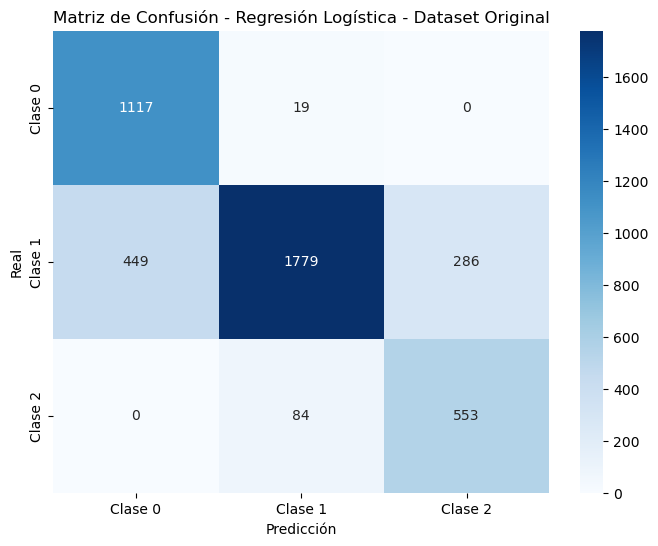

In [174]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# Reporte detallado de métricas (precision, recall, f1-score)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Clase 0', 'Clase 1', 'Clase 2'], yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Regresión Logística - Dataset Original')
plt.show()

In [175]:
# Obtener probabilidades
y_score = model_logistic.predict_proba(X_test)

# Binarizar las etiquetas reales
classes = np.sort(y_train['BurnRate_Class'].unique())
y_test_binarized = label_binarize(y_test['BurnRate_Class'], classes=classes)

# ROC Curve por clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

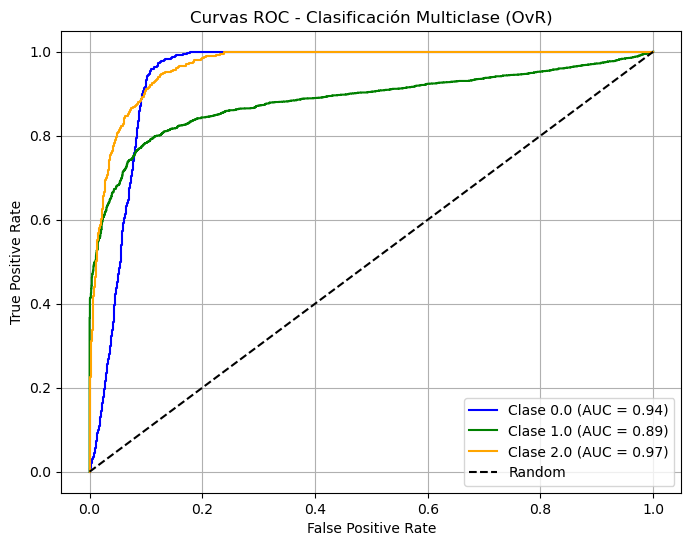

In [176]:
plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'orange']
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'Clase {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC - Clasificación Multiclase (OvR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

A partir de los resultados obtenidos, observamos que para el modelo de **Regresión Logística**:

- El modelo tiene un buen **accuracy del 80.5%**, lo cual indica un rendimiento global adecuado, pero hay diferencias notables entre las clases.

- Para la clase 0, el modelo tiene un alto recall, lo que indica que casi todas las instancias de clase 0 son correctamente identificadas, pero tiene una baja precisión, lo que sugiere que cuando predice clase 0, hay una buena cantidad de falsos positivos.

- Para la clase 1, el modelo tiene una alta precisión pero un bajo recall, lo que significa que predice clase 1 correctamente en la mayoría de los casos, pero no identifica muchas de las instancias reales de clase 1.

- Para la clase 2, el modelo tiene un buen recall pero una baja precisión, lo que indica que es capaz de identificar muchas instancias de la clase, pero también comete muchos falsos positivos.

A raíz de los resultados obtenidos, se decide realizar una optimización de los hiperparámetros y evaluar su impacto sobre las métricas.

#### 4. Optimización de hiperparámetros

In [177]:
# Definir el grid de parámetros para la búsqueda
param_grid = {
    'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Ajustar el parámetro C de LogisticRegression
    'estimator__solver': ['liblinear', 'saga'],      # Ajustar el solver de LogisticRegression
    'estimator__max_iter': [100, 200, 300]           # Ajustar el max_iter de LogisticRegression
}

In [178]:
# Realizar la búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(estimator=model_logistic, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

In [179]:
# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=OneVsRestClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                                        random_state=42)),
             param_grid={'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'estimator__max_iter': [100, 200, 300],
                         'estimator__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [180]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'estimator__C': 100, 'estimator__max_iter': 100, 'estimator__solver': 'liblinear'}


In [181]:
# Evaluar accuracy del mejor modelo encontrado
best_model = grid_search.best_estimator_

# Hacer predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

Accuracy: 0.8048

Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.98      0.83      1136
         1.0       0.95      0.71      0.81      2514
         2.0       0.66      0.87      0.75       637

    accuracy                           0.80      4287
   macro avg       0.77      0.85      0.80      4287
weighted avg       0.84      0.80      0.81      4287



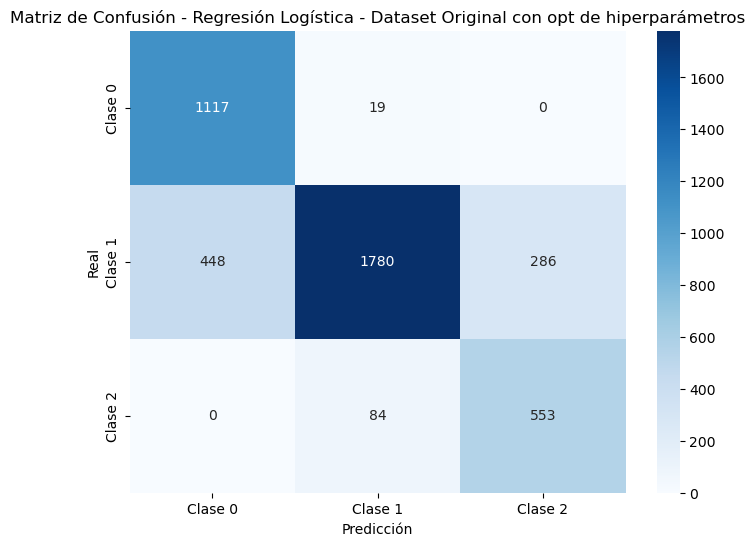

In [182]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# Reporte detallado de métricas (precision, recall, f1-score)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Clase 0', 'Clase 1', 'Clase 2'], yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Regresión Logística - Dataset Original con opt de hiperparámetros')
plt.show()

Luego de la optimización de hiperparámetros, se observa que los resultados obtenidos son prácticamente los mismos que se obtuvieron con los valores por default del modelo. Esto indica que los datos ya estaban bien ajustados, y que para este caso particular la modificación de los hiperparámetros no tiene un gran impacto sobre los resultados. 

A raíz de las diferencias observadas entre clases, se decide aplicar una estrategia de balance de clases previa al entrenamiento para analizar el impacto sobre los resultados.

#### 5. Modelo con estrategia previa de balance de clases

Se analiza el desbalance de clases y se propone aplicar una estrategia de undersampling (RandomUnderSampler) para balancearlas.

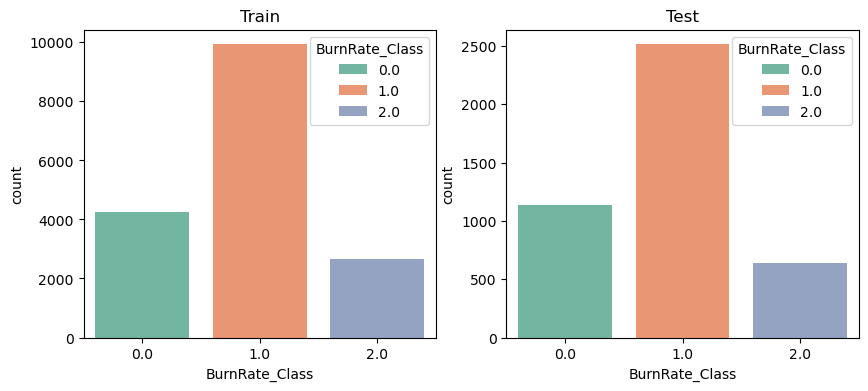

In [183]:
# Grafica las distribuciones de clases en los conjuntos de entrenamiento y prueba
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(x=y_train["BurnRate_Class"], hue=y_train["BurnRate_Class"], palette="Set2", ax=axes[0])
sns.countplot(x=y_test["BurnRate_Class"], hue=y_test["BurnRate_Class"], palette="Set2", ax=axes[1])

axes[0].set_title('Train')
axes[1].set_title('Test')

plt.show()

In [184]:
# Aplicación de Random Under Sampling para balancear el dataset

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_us, y_train_us = rus.fit_resample(X_train, y_train)

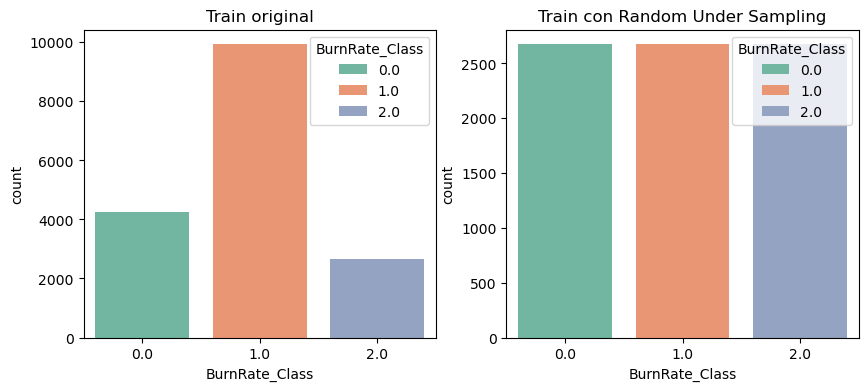

In [185]:
# Grafica las distribuciones de clases en los conjuntos de entrenamiento y prueba
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(x=y_train["BurnRate_Class"], hue=y_train["BurnRate_Class"], palette="Set2", ax=axes[0])
sns.countplot(x=y_train_us["BurnRate_Class"], hue=y_train_us["BurnRate_Class"], palette="Set2", ax=axes[1])

axes[0].set_title('Train original')
axes[1].set_title('Train con Random Under Sampling')

plt.show()

In [186]:
model_logistic = OneVsRestClassifier(LogisticRegression(random_state=42))
model_logistic.fit(X_train_us, y_train_us.values.ravel())

OneVsRestClassifier(estimator=LogisticRegression(random_state=42))

In [187]:
y_pred = model_logistic.predict(X_test)

Accuracy: 0.7761

Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.99      0.81      1136
         1.0       0.96      0.65      0.77      2514
         2.0       0.62      0.90      0.73       637

    accuracy                           0.78      4287
   macro avg       0.75      0.85      0.77      4287
weighted avg       0.83      0.78      0.78      4287



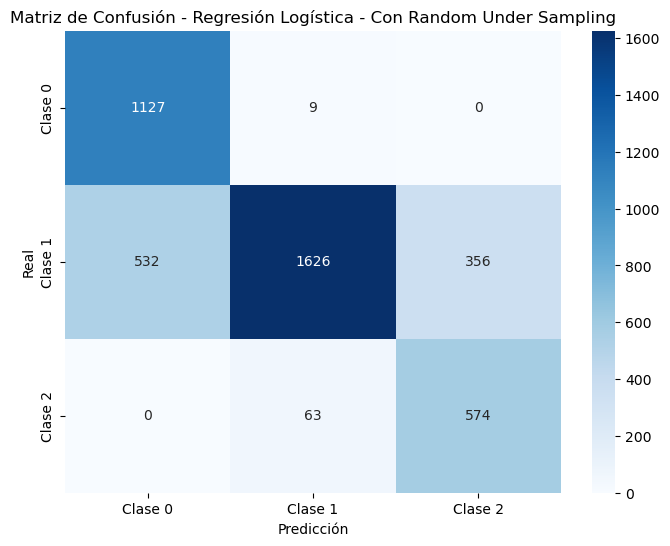

In [188]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# Reporte detallado de métricas (precision, recall, f1-score)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Clase 0', 'Clase 1', 'Clase 2'], yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Regresión Logística - Con Random Under Sampling')
plt.show()

Aplicando previamente una estrategia para el balance de las clases, **no se observa una mejoría** en las métricas del modelo, obteniéndose una accuracy del **77.6%**, en comparación con el 80.5% inicial. 

Para continuar con el análisis, se decide aplicar el modelo sobre el dataset con las componentes PCA.

#### 6. Modelo PCA

Se entrena el modelo de Regresión Logística Multiclase con las 6 componentes PCA.

In [189]:
model_logistic = OneVsRestClassifier(LogisticRegression(random_state=42, class_weight="balanced"))
model_logistic.fit(X_train_PCA, y_train.values.ravel())

OneVsRestClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                 random_state=42))

In [190]:
y_pred = model_logistic.predict(X_test_PCA)

Accuracy: 0.7758

Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.99      0.81      1136
         1.0       0.93      0.67      0.78      2514
         2.0       0.61      0.83      0.71       637

    accuracy                           0.78      4287
   macro avg       0.74      0.83      0.76      4287
weighted avg       0.82      0.78      0.78      4287



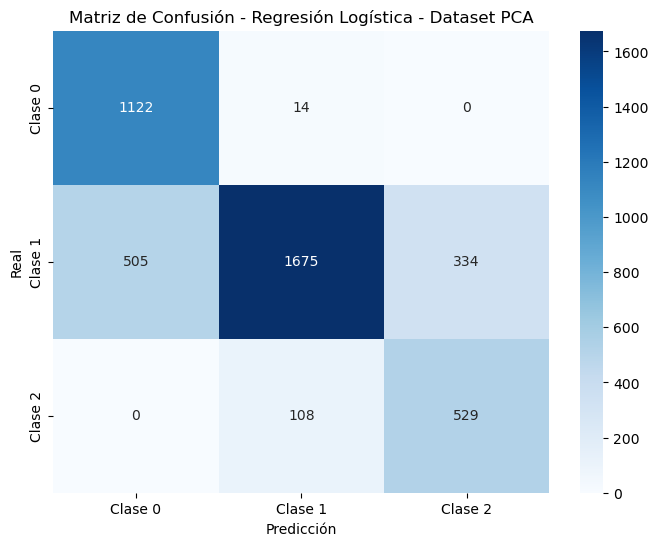

In [191]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# Reporte detallado de métricas (precision, recall, f1-score)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Clase 0', 'Clase 1', 'Clase 2'], yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Regresión Logística - Dataset PCA')
plt.show()

Entrenando el modelo con las 6 componentes PCA, **no se observa una mejoría** en las métricas del modelo, obteniéndose una accuracy del **77.6%**, en comparación con el 80.5% inicial, similar a la obtenida con el balance previo de clases. 

#### 7. Conclusiones

Se entrenaron 4 modelos con Regresión Logística Multiclase:
- Dataset original: accuracy 80.5%
- Dataset original con optimización de hiperparámetros: accuracy 80.5%
- Dataset con Random Under Sampling: accuracy 77.6%
- Dataset PCA 6 componentes: accuracy 77.6%

Para este modelo, los mejores resultados se obtuvieron con el dataset original, y no se observaron diferencias con la optimización de hiperparámetros. Estos resultados pueden deberse a que tanto con Random Undersampling como con PCA se está dando una pérdida de información importante. 

Con este resultado de accuracy del 80.5%, es posible concluir que la Regresión Logística no es el modelo más adecuado para este problema de clasificación, y se requerirán modelos más complejos para obtener mejores resultados.